# Построение графиков в Python

## Библиотека matplotlib

Основная библиотека, позволяющая быстро строить различные графики и диаграммы, в том числе и в 3D и анимированные. Входит в основное семейство научных пакетов, которые используются в Python (другие пакеты: numpy, scipy, sympy, scikit-learn, scikit-image, pandas).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Простые графики

In [2]:
x = np.linspace(-50, 50, 100000)
y = np.sin(x)/x
t = (1/(1+np.exp(-x)))

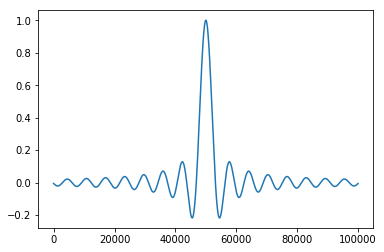

In [3]:
plt.plot(y)

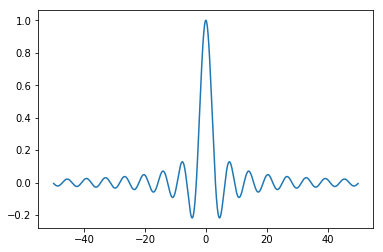

In [4]:
plt.plot(x,y)

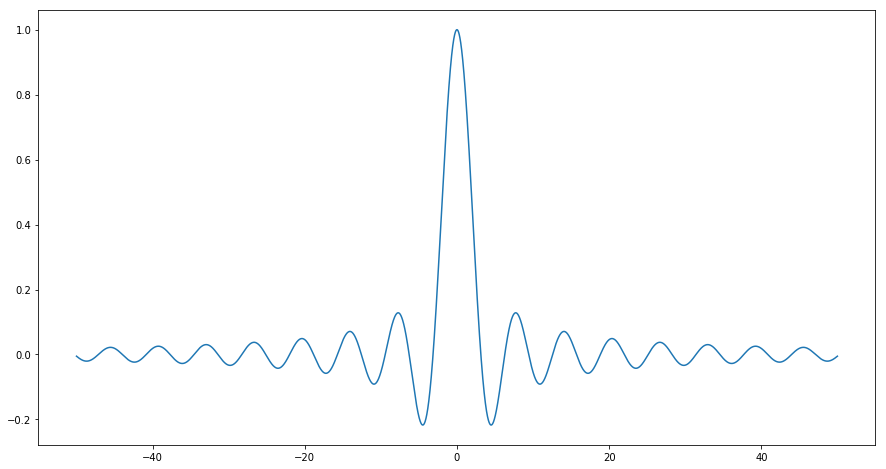

In [7]:
plt.figure(figsize=(15,8))
plt.plot(x,y);

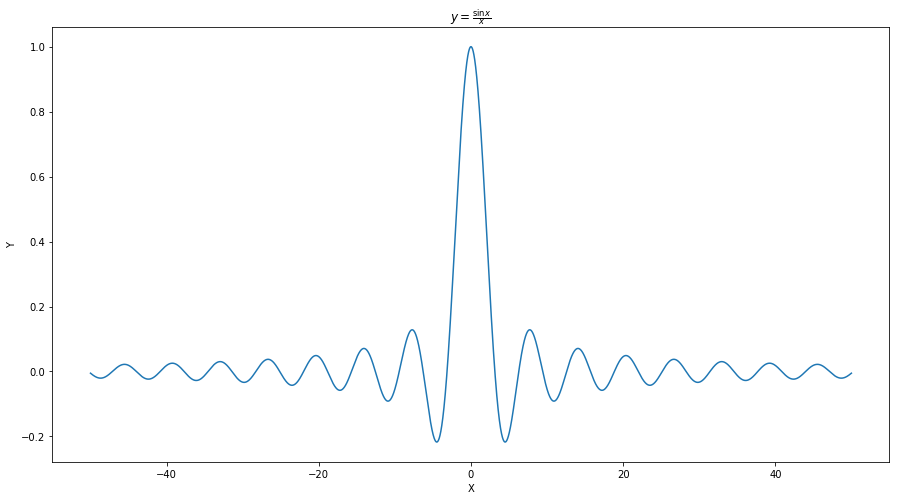

In [10]:
plt.figure(figsize=(15,8))
plt.plot(x,y)

plt.xlabel("X")
plt.ylabel("Y")
plt.title(r'$y = \frac{\sin x}{x}$');

Text(0.5,1,'Functions')

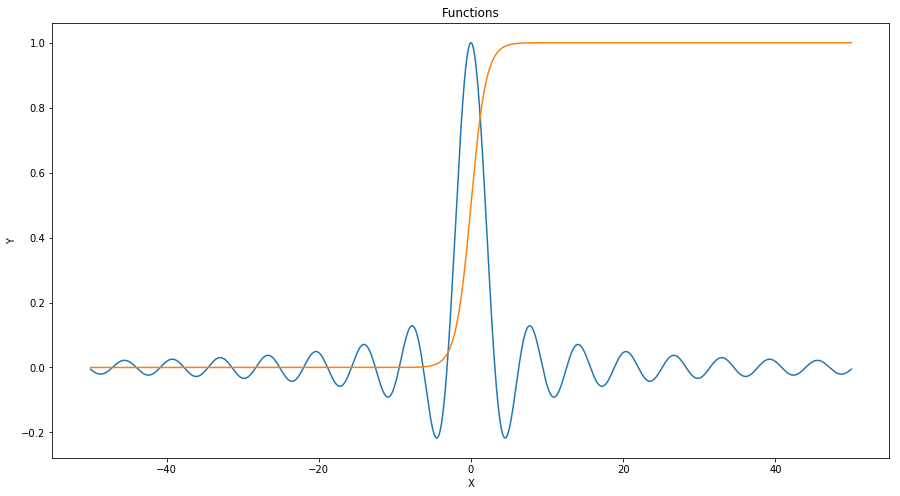

In [11]:
plt.figure(figsize=(15,8))

plt.plot(x, y)
plt.plot(x, t)

plt.xlabel("X")
plt.ylabel("Y")
plt.title(r'Functions')


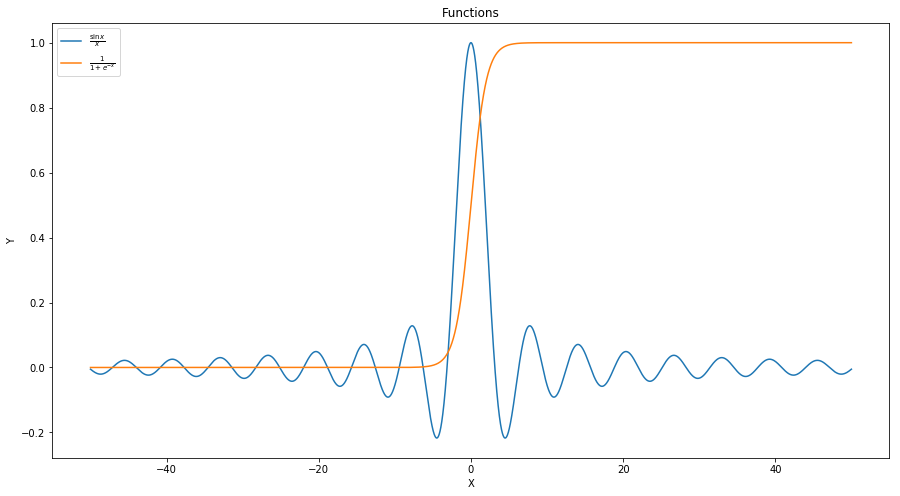

In [15]:
plt.figure(figsize=(15,8))

plt.plot(x, y, label=r'$\frac{\sin x}{x}$')
plt.plot(x, t, label=r'$\frac{1}{1+e^{-x}}$')

plt.xlabel("X")
plt.ylabel("Y")
plt.title(r'Functions')

plt.legend();

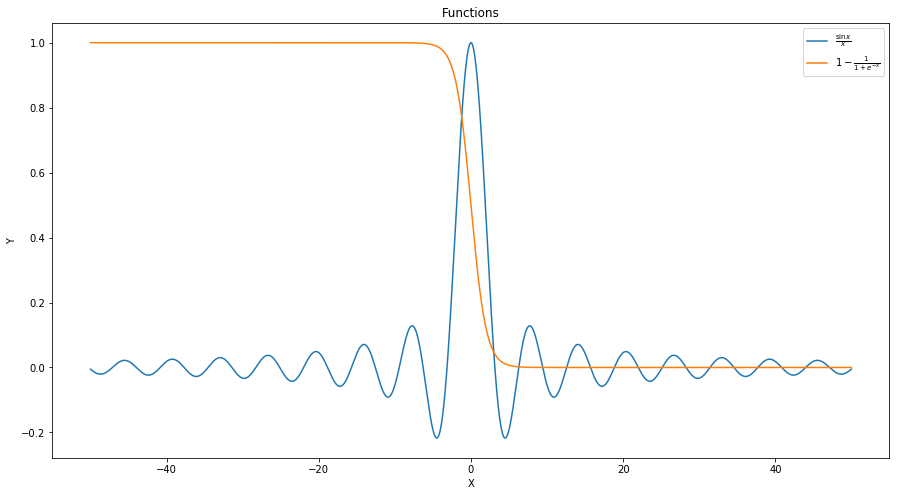

In [16]:
plt.figure(figsize=(15,8))

plt.plot(x, y, label=r'$\frac{\sin x}{x}$')
plt.plot(x, 1-t, label=r'$1-\frac{1}{1+e^{-x}}$')

plt.xlabel("X")
plt.ylabel("Y")
plt.title(r'Functions')

plt.legend();

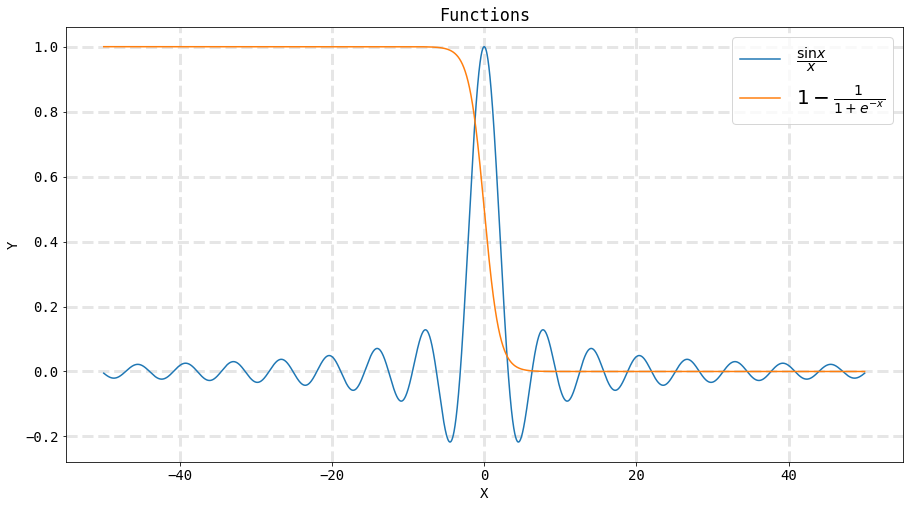

In [22]:
plt.rc("font", size=14)

plt.figure(figsize=(15,8))

plt.plot(x, y, label=r'$\frac{\sin x}{x}$')
plt.plot(x, 1-t, label=r'$1-\frac{1}{1+e^{-x}}$')

plt.xlabel("X")
plt.ylabel("Y")
plt.title(r'Functions')

plt.rc("font", size=20, family="monospace")
plt.legend()

plt.rc('grid', c="0.9", ls='--', lw=3)
plt.grid()

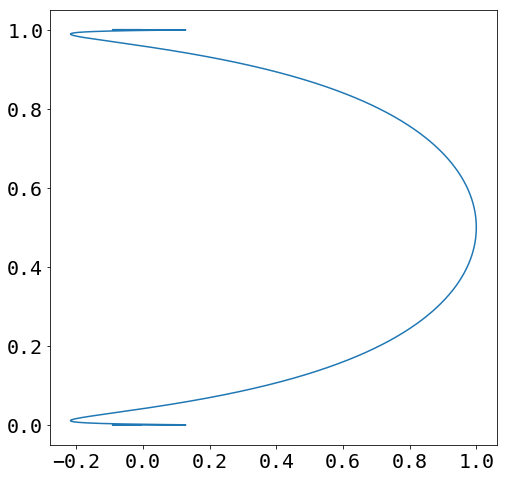

In [23]:
plt.figure(figsize=(8,8))
plt.plot(y,t)

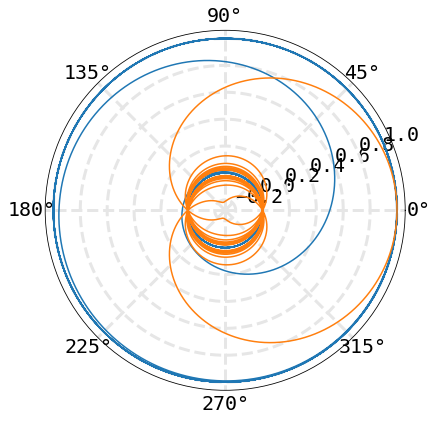

In [35]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1], projection='polar')
ax.plot(x, t)
ax.plot(x, y)

Text(0.5,1,'Figure 2')

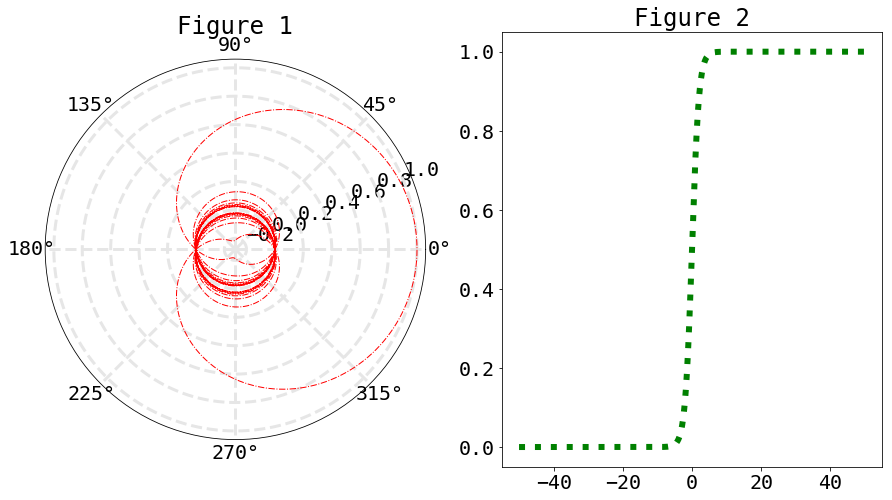

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1, projection="polar")
plt.plot(x, y, ls="-.", c="r", lw=1)
plt.title("Figure 1")
plt.subplot(1, 2, 2)
plt.plot(x, t, ls=":", c="g", lw=6)
plt.title("Figure 2")

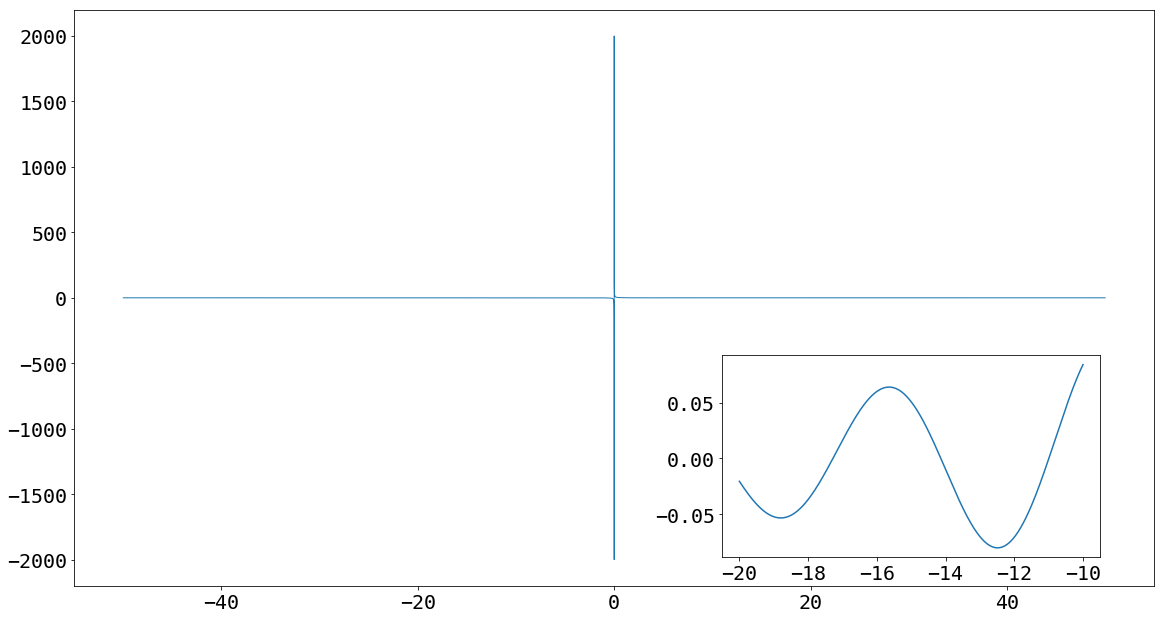

In [46]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(x, np.cos(x)/x, lw=1)

ax = fig.add_axes([0.6,0.05,0.35,0.35])
q = np.linspace(-20, -10, 1000)
ax.plot(q, np.cos(q)/q)

In [47]:
from ipywidgets import interactive, widgets

In [57]:
def func(p1, p2, p3, p4):
    try: 
        plt.figure(figsize=(8,8))
        plt.title('Bézier Curve')

        x1, y1 = map(int, p1.split())
        x2, y2 = map(int, p2.split())
        x3, y3 = map(int, p3.split())
        x4, y4 = map(int, p4.split())

        t = np.linspace(0,1,1000)
        x = (x1*t*t*t + 
             x2*3*t*t*(1-t) + 
             x3*3*t*(1-t)*(1-t) + 
             x4*(1-t)*(1-t)*(1-t))
        y = (y1*t*t*t + 
             y2*3*t*t*(1-t) + 
             y3*3*t*(1-t)*(1-t) + 
             y4*(1-t)*(1-t)*(1-t))
        plt.plot(x,y)
        plt.scatter([x1,x2,x3,x4],[y1,y2,y3,y4])
        plt.show()
    except: pass
    
interactive(func, p1='1 1', p2='2 3', p3='5 1', p4='2 3')

A Jupyter Widget

In [78]:
import seaborn as sns
import pandas as pd

In [77]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000)

In [80]:
data = pd.DataFrame(X)

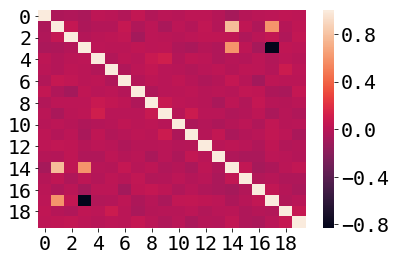

In [82]:
sns.heatmap(data.corr())

# Построение диаграмы рассеяния

In [93]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_samples=100000)

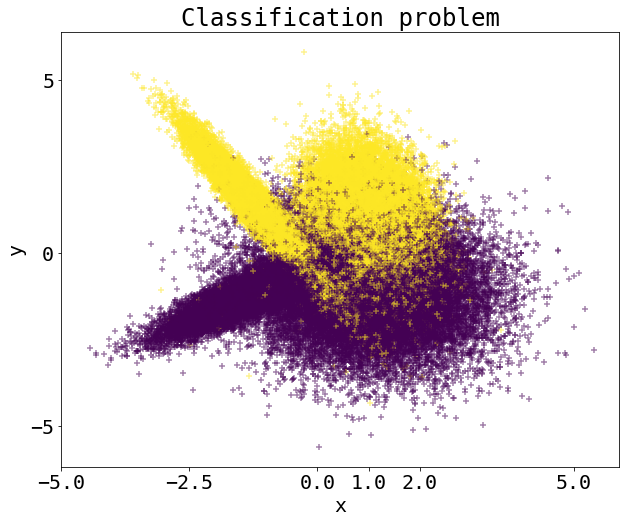

In [97]:
plt.figure(figsize=(10,8))

plt.scatter(X[:,0], X[:,1], c=y, alpha = 0.5, marker="+")

plt.xticks([-5,-2.5,0,1,2,5])
plt.yticks([-5,0,5])

plt.xlabel("x")
plt.ylabel("y")
plt.title("Classification problem");

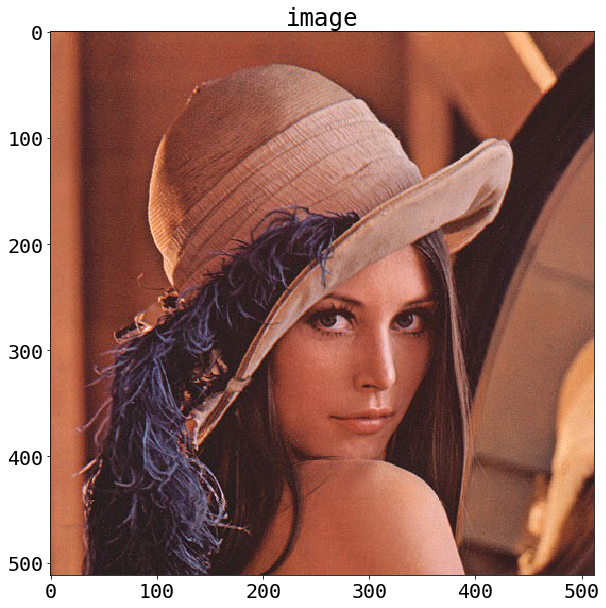

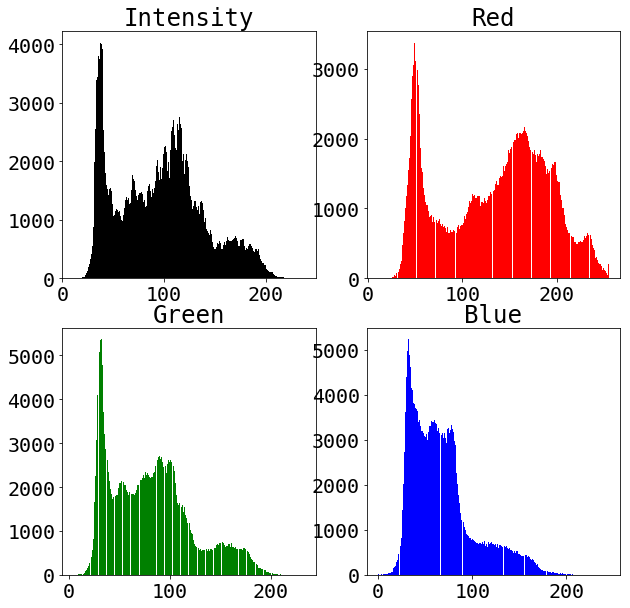

In [103]:
lenna = plt.imread("lena.jpg")
plt.figure(figsize=(10,10))
plt.imshow(lenna)
plt.title("image")

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist((lenna[:,:,0]*0.3+lenna[:,:,1]*0.59+lenna[:,:,2]*0.11).reshape(-1), 
         bins = 256, color="black")
plt.title("Intensity")
plt.subplot(2,2,2)
plt.hist(lenna[:,:,0].reshape(-1), color="red", bins = 256)
plt.title("Red")
plt.subplot(2,2,3)
plt.hist(lenna[:,:,1].reshape(-1), color="green", bins = 256)
plt.title("Green")
plt.subplot(2,2,4)
plt.hist(lenna[:,:,2].reshape(-1), color="blue", bins = 256)
plt.title("Blue");

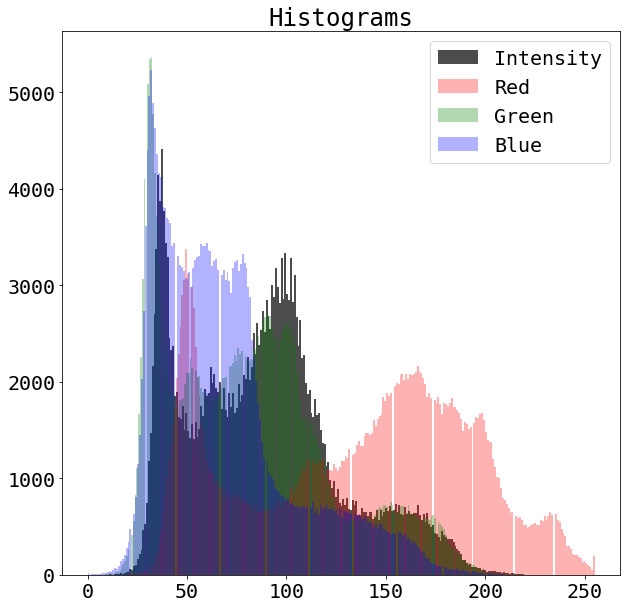

In [105]:
plt.figure(figsize=(10,10))
plt.hist((lenna[:,:,0]*0.3+lenna[:,:,2]*0.59+lenna[:,:,2]*0.11).reshape(-1), 
         bins = 256, color="black", label="Intensity", alpha = 0.7)
plt.hist(lenna[:,:,0].reshape(-1), color="red", bins = 256, label="Red", alpha = 0.3)
plt.hist(lenna[:,:,1].reshape(-1), color="green", bins = 256, label="Green", alpha = 0.3)
plt.hist(lenna[:,:,2].reshape(-1), color="blue", bins = 256, label="Blue", alpha = 0.3)
plt.legend()
plt.title("Histograms");

### Ящик с усами

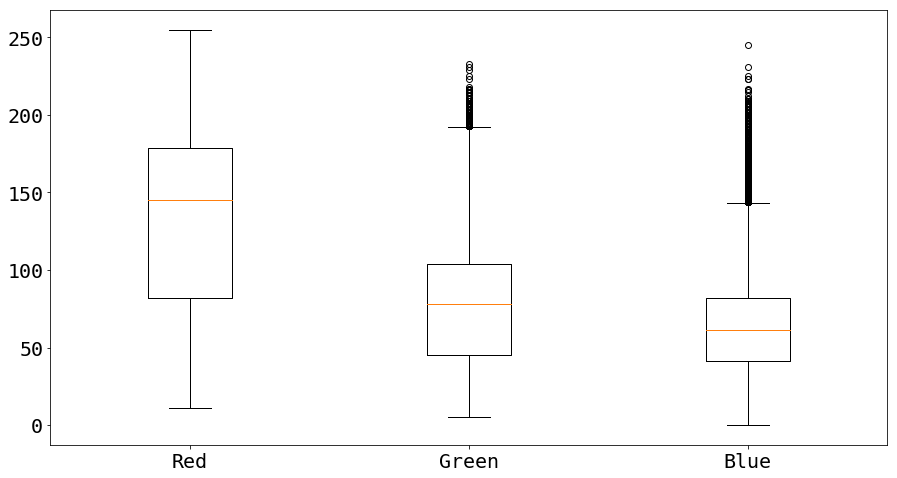

In [107]:
plt.figure(figsize=(15,8))
plt.boxplot(lenna.reshape(-1, 3), labels=["Red", "Green", "Blue"]);

In [108]:
import seaborn as sns
import pandas as pd

In [122]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_informative=2, n_repeated=2, n_features=6)

In [124]:
data = pd.DataFrame(X)

In [113]:
data.to_csv("test.csv")

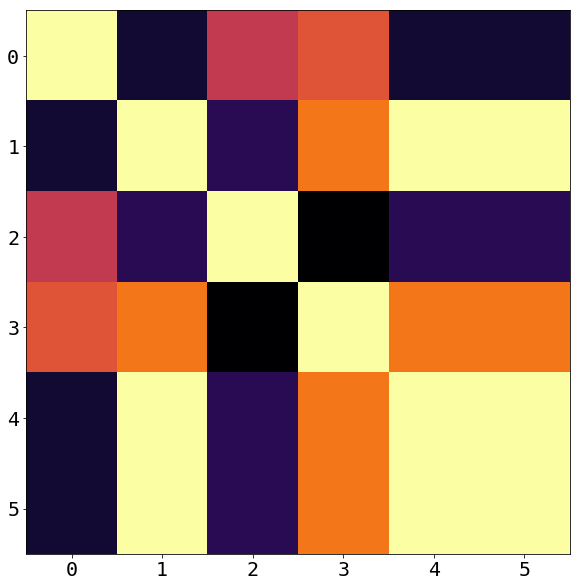

In [132]:
plt.figure(figsize=(10,10))
plt.imshow(data.corr(), cmap="inferno")

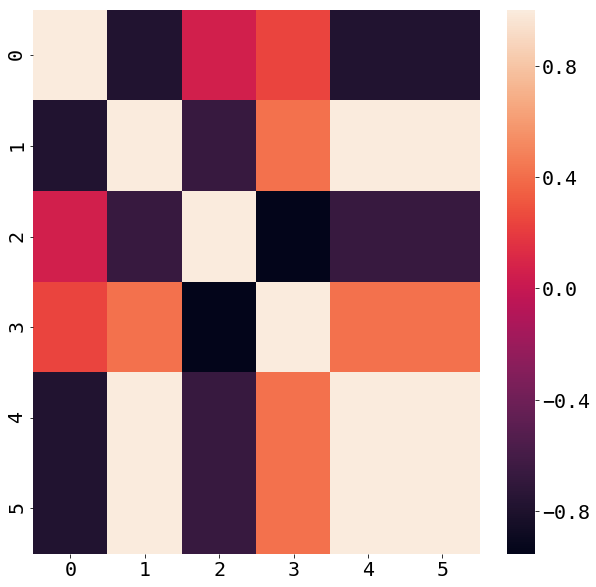

In [129]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

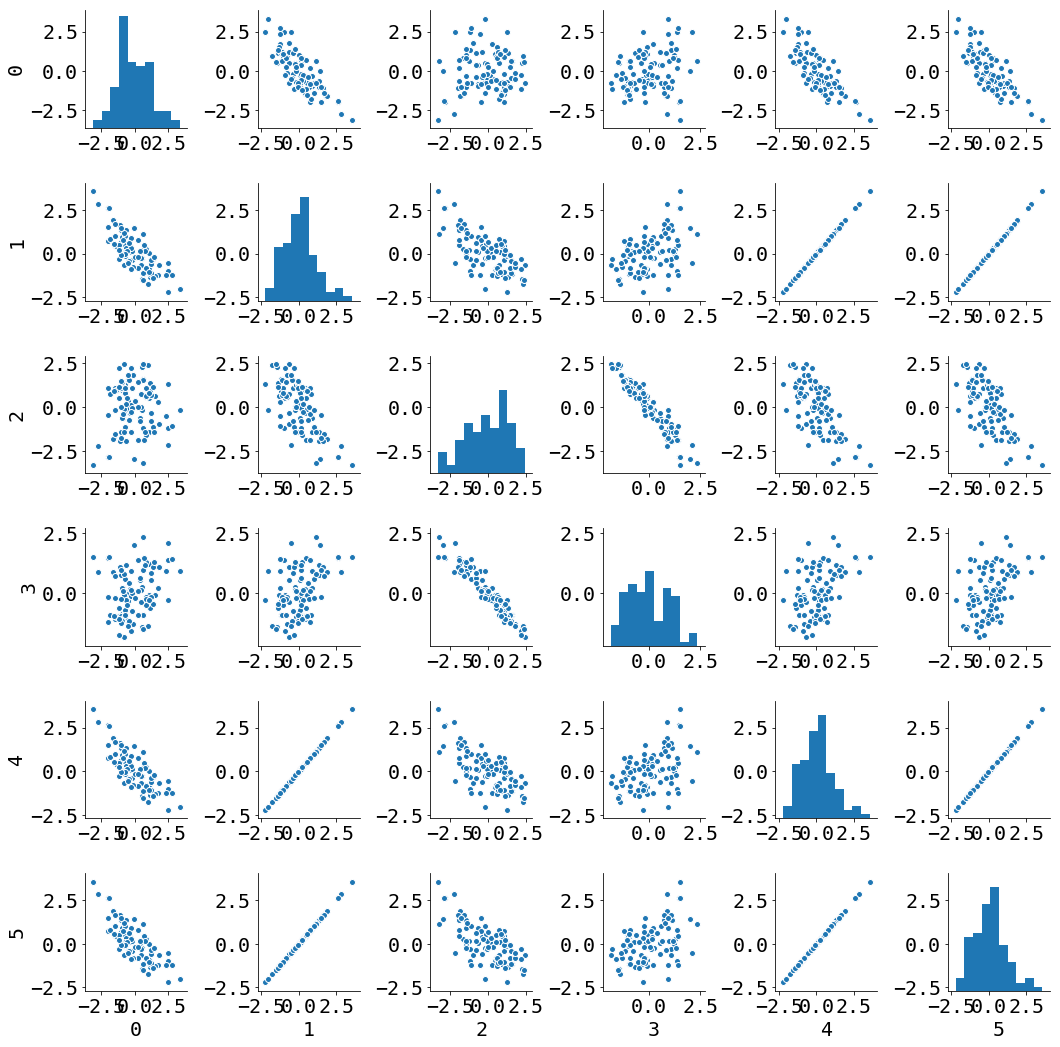

In [127]:
sns.pairplot(data)

In [1]:
import matplotlib.pyplot as plt